# Loan Approval Prediction
## Importing dataset from Kaggle

In [16]:
import xml.dom.minidom

import kagglehub
import numpy as np

# Download latest version
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/kareemelnaghy/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


In [17]:
import os
os.listdir(path)

['loan_approval_dataset.csv']

In [18]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "loan_approval_dataset.csv"))


In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [20]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Data Cleaning and Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

# convert categorical features to numerical using label encoding
categorical_features = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


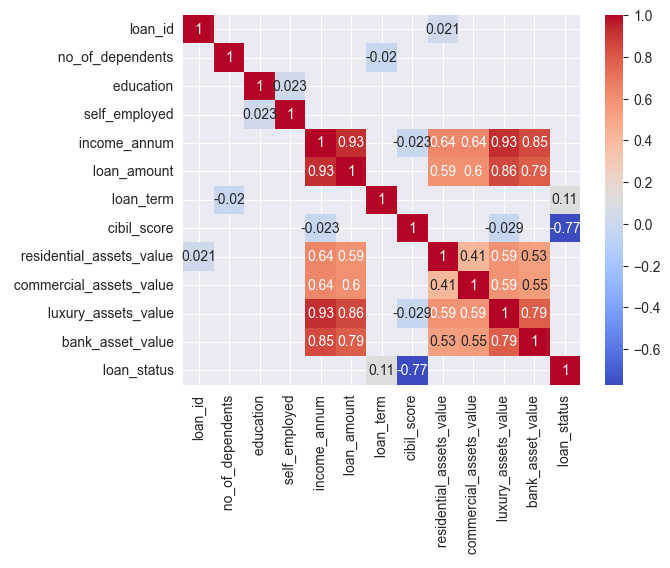

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df.dropna(inplace=True, axis=0)
corr_matrix = df.corr()
threshold = 0.02

mask = np.abs(corr_matrix) < threshold
filtered_matrix = corr_matrix.mask(mask)

sns.heatmap(filtered_matrix, annot=True, cmap="coolwarm")
plt.show()

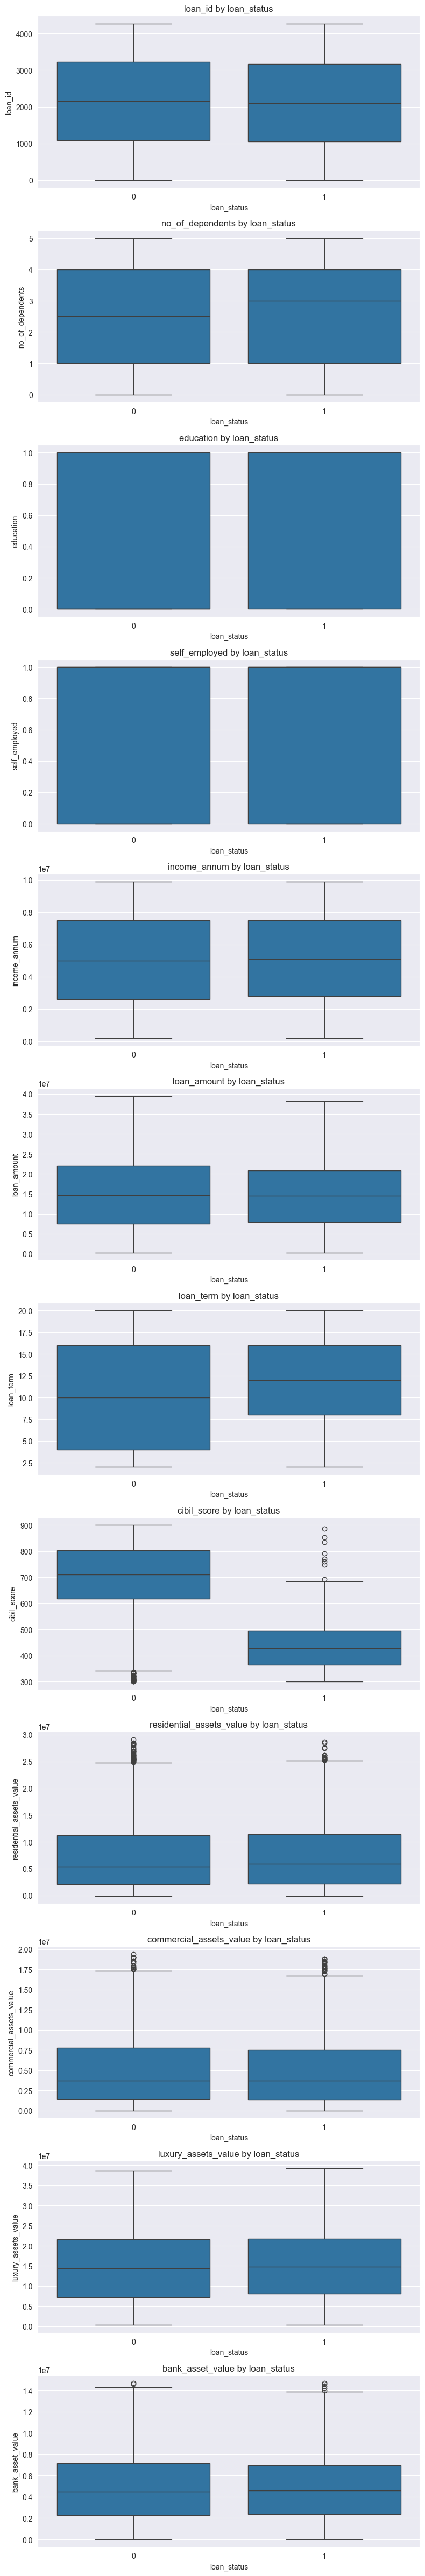

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df.columns = df.columns.str.strip()
features = [col for col in df.columns if col != 'loan_status']
num_features = len(features)

fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(8, 4 * num_features))

for ax, feature in zip(axes, features):
    sns.boxplot(x='loan_status', y=feature, data=df, ax=ax)
    ax.set_xlabel('loan_status')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} by loan_status')

plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

df.dropna(inplace=True, axis=0)

X = df['cibil_score']
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



In [25]:
y_train.value_counts()

loan_status
0    2120
1    1295
Name: count, dtype: int64

 ## Model Training and Evaluation
 After preprocessing the data, we find out that the data is imbalanced with a majority of approved loans (0) and that the only feature that is significant is the 'cibil_score'.

In [26]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train.values.reshape(-1,1), y_train.values)

LogisticRegression()

In [27]:
predictions = model.predict(X_test.values.reshape(-1,1))

In [28]:
print("After categorical encoding, Approved = 0, Rejected = 1")
print("Predictions for the first 5 samples:")
print(predictions[:5])
print("Actual labels for the first 5 samples:")
print(y_test.head().values)

After categorical encoding, Approved = 0, Rejected = 1
Predictions for the first 5 samples:
[1 0 1 0 0]
Actual labels for the first 5 samples:
[1 0 1 0 0]


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

Precision: 0.8957055214723927
Recall: 0.9182389937106918
F1 Score: 0.906832298136646


In [33]:
from imblearn.over_sampling import SMOTE

# Logistic regression model with SMOTE resampling
X_reshaped = X_train.values.reshape(-1,1)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_reshaped, y_train)

resampled_model = LogisticRegression()
resampled_model.fit(X_resampled, y_resampled)


LogisticRegression()

In [34]:
resampled_predictions = resampled_model.predict(X_reshaped)

In [35]:
print("Precision after resampling:", precision_score(y_train, resampled_predictions))
print("Recall after resampling:", recall_score(y_train, resampled_predictions))
print("F1 Score after resampling:", f1_score(y_train, resampled_predictions))

Precision after resampling: 0.895949720670391
Recall after resampling: 0.9907335907335907
F1 Score after resampling: 0.9409607627429409


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train.values.reshape(-1,1), y_train.values)

DecisionTreeClassifier()

In [37]:
dt_predictions = dt_model.predict(X_test.values.reshape(-1,1))

In [38]:
print("Precision after decision tree:", precision_score(y_test, dt_predictions))
print("Recall after decision tree:", recall_score(y_test, dt_predictions))
print("F1 Score after decision tree:", f1_score(y_test, dt_predictions))

Precision after decision tree: 0.8994082840236687
Recall after decision tree: 0.9559748427672956
F1 Score after decision tree: 0.926829268292683


In [39]:
# Decision Tree Model with SMOTE resampling
dt_model_resampled = DecisionTreeClassifier()
dt_model_resampled.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [41]:
dt_resampled_predictions = dt_model_resampled.predict(X_test.values.reshape(-1,1))

In [42]:
print("Precision after decision tree:", precision_score(y_test, dt_resampled_predictions))
print("Recall after decision tree:", recall_score(y_test, dt_resampled_predictions))
print("F1 Score after decision tree:", f1_score(y_test, dt_resampled_predictions))


Precision after decision tree: 0.9014492753623189
Recall after decision tree: 0.9779874213836478
F1 Score after decision tree: 0.9381598793363499
